In [1]:
#Libraries for data processing, visualization, and clustering are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings("ignore")

In [3]:
#The Spotify 2023 dataset is loaded.
df = pd.read_csv('C:/Users/edgar/Documents/GitHub/music_recommendation_system/data/spotify2023.csv', encoding = 'latin-1')

In [4]:
df.head(30)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


In [5]:
df.shape

(953, 24)

In [77]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import csv
import json
import re

# url to scrape the lyrics from
base_url = "https://www.azlyrics.com/lyrics/{}/{}.html"

processed_songs = []
processed_names = []

# preprocessing the songs name for scraping
for song in df.track_name:
    
    if "(" not in song:
        processed_song = re.sub(r'\W+', '', song).lower()
        processed_songs.append(processed_song)
        
    else:
  
        processed_song = re.sub(r'\(.*$', '', song).lower()
        processed_song = re.sub(r'\W+', '', processed_song).lower()
        processed_songs.append(processed_song)
 
    
    
for name in df['artist(s)_name']:
    
    if ', ' not in name:
        processed_name = re.sub(r'\W+', '', name).lower()
        processed_names.append(processed_name)
        
    else:
        processed_name = re.sub(r',.*$', '', name).lower()
        processed_name = re.sub(r'\W+', '', processed_name).lower()
        processed_names.append(processed_name)


processed_songs




['seven',
 'lala',
 'vampire',
 'cruelsummer',
 'whereshegoes',
 'sprinter',
 'ellabailasola',
 'columbia',
 'fukumean',
 'labeberemix',
 'unx100to',
 'supershy',
 'flowers',
 'daylight',
 'asitwas',
 'killbill',
 'cupidtwinver',
 'whatwasimadeforfromthemotionpicturebarbie',
 'classy101',
 'likecrazy',
 'ladygaga',
 'icanseeyou',
 'iwannabeyours',
 'pesoplumabzrpmusicsessionsvol55',
 'popular',
 'saborfresa',
 'calmdown',
 'mojabighost',
 'lastnight',
 'dancethenight',
 'rush',
 'tulum',
 'creepin',
 'antihero',
 'tqg',
 'losdelespacio',
 'frï½ï½gil',
 'blankspace',
 'style',
 'tqm',
 'elazul',
 'sunflowerspidermanintothespiderverse',
 'imgood',
 'seeyouagain',
 'barbieworld',
 'angelslikeyou',
 'iaintworried',
 'dieforyou',
 'starboy',
 'dieforyouremix',
 'elcielo',
 'babydonthurtme',
 'amargura',
 '',
 'anotherlove',
 'blindinglights',
 'moonlight',
 'labachata',
 's91',
 'cardigan',
 'tï½ï',
 'boysaliarpt2',
 'leftandright',
 'beso',
 'heymor',
 'yellow',
 'karma',
 'people',
 'over

In [418]:
lyrics_not_found_for = []

# delay after each execution of call for not exceeding the requests count and also not to overburden the server
delay = 10

song_names = []
lyrics = []

for artist, song in zip(processed_names, processed_songs):
        
        final_url = base_url.format(artist, song)
        print(final_url)

        try:
            html_page = urlopen(final_url)
            soup = BeautifulSoup(html_page, 'html.parser')

            html_pointer = soup.find('div', attrs={'class':'ringtone'})
            song_name = html_pointer.find_next('b').contents[0].strip()
            song_lyrics = html_pointer.find_next('div').text.strip()
            
            song_names.append(song_name)
            lyrics.append(song_lyrics)
   
            
            print("Lyrics successfully written to file for : " + song_name)
            
        except:
            print("Lyrics not found for : " + song)
            lyrics_not_found_for.append(song)
            
        finally:
            sleep(delay) 
            


https://www.azlyrics.com/lyrics/latto/seven.html
Lyrics not found for : seven
https://www.azlyrics.com/lyrics/myketowers/lala.html
Lyrics successfully written to file for : "LALA"
https://www.azlyrics.com/lyrics/oliviarodrigo/vampire.html
Lyrics successfully written to file for : "vampire"
https://www.azlyrics.com/lyrics/taylorswift/cruelsummer.html
Lyrics successfully written to file for : "Cruel Summer"
https://www.azlyrics.com/lyrics/badbunny/whereshegoes.html
Lyrics successfully written to file for : "WHERE SHE GOES"
https://www.azlyrics.com/lyrics/dave/sprinter.html
Lyrics successfully written to file for : "Sprinter"
https://www.azlyrics.com/lyrics/eslabonarmado/ellabailasola.html
Lyrics successfully written to file for : "Ella Baila Sola"
https://www.azlyrics.com/lyrics/quevedo/columbia.html
Lyrics successfully written to file for : "Columbia"
https://www.azlyrics.com/lyrics/gunna/fukumean.html
Lyrics successfully written to file for : "fukumean"
https://www.azlyrics.com/lyrics/

https://www.azlyrics.com/lyrics/samsmith/unholy.html
Lyrics successfully written to file for : "Unholy"
https://www.azlyrics.com/lyrics/yandel/yandel150.html
Lyrics successfully written to file for : "Yandel 150"
https://www.azlyrics.com/lyrics/mariabecerra/corazï½ï½nva.html
Lyrics not found for : corazï½ï½nva
https://www.azlyrics.com/lyrics/vancejoy/riptide.html
Lyrics successfully written to file for : "Riptide"
https://www.azlyrics.com/lyrics/embeihold/untilifoundyou.html
Lyrics not found for : untilifoundyou
https://www.azlyrics.com/lyrics/mclivinho/novidadenaï½ï.html
Lyrics not found for : novidadenaï½ï
https://www.azlyrics.com/lyrics/taylorswift/backtodecember.html
Lyrics successfully written to file for : "Back To December"
https://www.azlyrics.com/lyrics/justinbieber/stay.html
Lyrics not found for : stay
https://www.azlyrics.com/lyrics/marshmello/elmerengue.html
Lyrics successfully written to file for : "El Merengue"
https://www.azlyrics.com/lyrics/lewiscapaldi/someoneyouloved.

Lyrics successfully written to file for : "Nosso Quadro"
https://www.azlyrics.com/lyrics/brunomars/lockedoutofheaven.html
Lyrics successfully written to file for : "Locked Out Of Heaven"
https://www.azlyrics.com/lyrics/bigone/unfindecrossover2.html
Lyrics not found for : unfindecrossover2
https://www.azlyrics.com/lyrics/drake/jimmycooks.html
Lyrics successfully written to file for : "Jimmy Cooks"
https://www.azlyrics.com/lyrics/onerepublic/countingstars.html
Lyrics successfully written to file for : "Counting Stars"
https://www.azlyrics.com/lyrics/justinbieber/ghost.html
Lyrics successfully written to file for : "Ghost"
https://www.azlyrics.com/lyrics/chrisbrown/undertheinfluence.html
Lyrics successfully written to file for : "Under The Influence"
https://www.azlyrics.com/lyrics/natanaelcano/prc.html
Lyrics successfully written to file for : "PRC"
https://www.azlyrics.com/lyrics/daddyyankee/gasolina.html
Lyrics successfully written to file for : "Gasolina"
https://www.azlyrics.com/lyri

https://www.azlyrics.com/lyrics/jamesblake/hummingbird.html
Lyrics not found for : hummingbird
https://www.azlyrics.com/lyrics/israelrodolffo/seubrilhosumiuaovivo.html
Lyrics not found for : seubrilhosumiuaovivo
https://www.azlyrics.com/lyrics/stevelacy/badhabit.html
Lyrics successfully written to file for : "Bad Habit"
https://www.azlyrics.com/lyrics/beyoncï/cuffit.html
Lyrics not found for : cuffit
https://www.azlyrics.com/lyrics/halsey/lilith.html
Lyrics successfully written to file for : "Lilith"
https://www.azlyrics.com/lyrics/nickyjam/69.html
Lyrics successfully written to file for : "69"
https://www.azlyrics.com/lyrics/seanpaul/niï½ï½abo.html
Lyrics not found for : niï½ï½abo
https://www.azlyrics.com/lyrics/drake/searchrescue.html
Lyrics successfully written to file for : "Search & Rescue"
https://www.azlyrics.com/lyrics/kendricklamar/americahasaproblem.html
Lyrics not found for : americahasaproblem
https://www.azlyrics.com/lyrics/taylorswift/lavenderhaze.html
Lyrics successfully

Lyrics successfully written to file for : "HAPPY"
https://www.azlyrics.com/lyrics/ynglvcas/labebe.html
Lyrics successfully written to file for : "La Bebe"
https://www.azlyrics.com/lyrics/kanii/iknowpr1svxedit.html
Lyrics successfully written to file for : "I Know (PR1SVX Edit)"
https://www.azlyrics.com/lyrics/harrystyles/latenighttalking.html
Lyrics successfully written to file for : "Late Night Talking"
https://www.azlyrics.com/lyrics/marï½ï½liamendo/leï½.html
Lyrics not found for : leï½
https://www.azlyrics.com/lyrics/arianagrande/saveyourtears.html
Lyrics not found for : saveyourtears
https://www.azlyrics.com/lyrics/zachbryan/somethingintheorange.html
Lyrics successfully written to file for : "Something In The Orange"
https://www.azlyrics.com/lyrics/melaniemartinez/void.html
Lyrics successfully written to file for : "VOID"
https://www.azlyrics.com/lyrics/fuerzaregida/dijeronquenolaibalograr.html
Lyrics not found for : dijeronquenolaibalograr
https://www.azlyrics.com/lyrics/taylorswi

https://www.azlyrics.com/lyrics/pnk/trustfall.html
Lyrics not found for : trustfall
https://www.azlyrics.com/lyrics/lesserafim/antifragile.html
Lyrics successfully written to file for : "ANTIFRAGILE"
https://www.azlyrics.com/lyrics/pinkpantheress/boysaliar.html
Lyrics successfully written to file for : "Boy's A Liar"
https://www.azlyrics.com/lyrics/taeyang/vibe.html
Lyrics successfully written to file for : "VIBE"
https://www.azlyrics.com/lyrics/sza/shirt.html
Lyrics successfully written to file for : "Shirt"
https://www.azlyrics.com/lyrics/rihanna/liftmeupfromblackpantherwakandaforevermusicfromandinspiredby.html
Lyrics not found for : liftmeupfromblackpantherwakandaforevermusicfromandinspiredby
https://www.azlyrics.com/lyrics/lilnasx/starwalkin.html
Lyrics not found for : starwalkin
https://www.azlyrics.com/lyrics/beachweather/sexdrugsetc.html
Lyrics successfully written to file for : "Sex, Drugs, Etc."
https://www.azlyrics.com/lyrics/halsey/boywithluv.html
Lyrics not found for : boyw

Lyrics not found for : sleighride
https://www.azlyrics.com/lyrics/sza/seekdestroy.html
Lyrics successfully written to file for : "Seek & Destroy"
https://www.azlyrics.com/lyrics/sza/lovelanguage.html
Lyrics successfully written to file for : "Love Language"
https://www.azlyrics.com/lyrics/johnlennon/happyxmas.html
Lyrics not found for : happyxmas
https://www.azlyrics.com/lyrics/sza/used.html
Lyrics successfully written to file for : "Used"
https://www.azlyrics.com/lyrics/burlives/ahollyjollychristmassingleversion.html
Lyrics not found for : ahollyjollychristmassingleversion
https://www.azlyrics.com/lyrics/natkingcole/thechristmassong.html
Lyrics successfully written to file for : "The Christmas Song"
https://www.azlyrics.com/lyrics/paulmccartney/wonderfulchristmastimeeditedversionremastered2011.html
Lyrics not found for : wonderfulchristmastimeeditedversionremastered2011
https://www.azlyrics.com/lyrics/bandaid/dotheyknowitschristmas1984version.html
Lyrics not found for : dotheyknowitsc

https://www.azlyrics.com/lyrics/billieeilish/happierthanever.html
Lyrics successfully written to file for : "Happier Than Ever"
https://www.azlyrics.com/lyrics/theweeknd/mothtoaflame.html
Lyrics not found for : mothtoaflame
https://www.azlyrics.com/lyrics/juancruztoledo/traitor.html
Lyrics not found for : traitor
https://www.azlyrics.com/lyrics/boywithuke/toxic.html
Lyrics successfully written to file for : "Toxic"
https://www.azlyrics.com/lyrics/oliviarodrigo/driverslicense.html
Lyrics successfully written to file for : "drivers license"
https://www.azlyrics.com/lyrics/xamï½ï½/malvadï½ï.html
Lyrics not found for : malvadï½ï
https://www.azlyrics.com/lyrics/taylorswift/alltoowell.html
Lyrics successfully written to file for : "All Too Well"
https://www.azlyrics.com/lyrics/theweeknd/donï½ï½ï½tbreakmy.html
Lyrics not found for : donï½ï½ï½tbreakmy
https://www.azlyrics.com/lyrics/adele/ohmygod.html
Lyrics successfully written to file for : "Oh My God"
https://www.azlyrics.com/lyrics/litkill

Lyrics successfully written to file for : "Bored"
https://www.azlyrics.com/lyrics/billieeilish/happierthaneveredit.html
Lyrics not found for : happierthaneveredit
https://www.azlyrics.com/lyrics/maskedwolf/astronautintheocean.html
Lyrics successfully written to file for : "Astronaut In The Ocean"
https://www.azlyrics.com/lyrics/anuelaa/leyseca.html
Lyrics not found for : leyseca
https://www.azlyrics.com/lyrics/niki/everysummertime.html
Lyrics successfully written to file for : "Every Summertime"
https://www.azlyrics.com/lyrics/brunomars/talkingtothemoon.html
Lyrics successfully written to file for : "Talking To The Moon"
https://www.azlyrics.com/lyrics/tatemcrae/youbrokemefirst.html
Lyrics successfully written to file for : "You Broke Me First"
https://www.azlyrics.com/lyrics/avicii/thenights.html
Lyrics successfully written to file for : "The Nights"
https://www.azlyrics.com/lyrics/theweeknd/takemybreath.html
Lyrics not found for : takemybreath
https://www.azlyrics.com/lyrics/drake/wa

https://www.azlyrics.com/lyrics/edsheeran/thinkingoutloud.html
Lyrics successfully written to file for : "Thinking Out Loud"
https://www.azlyrics.com/lyrics/labrinth/stilldontknowmyname.html
Lyrics successfully written to file for : "Still Don't Know My Name"
https://www.azlyrics.com/lyrics/v/christmastree.html
Lyrics not found for : christmastree
https://www.azlyrics.com/lyrics/marï½ï½liamendonï½ï½a/malfeitoaovivo.html
Lyrics not found for : malfeitoaovivo
https://www.azlyrics.com/lyrics/labrinth/whenirip.html
Lyrics successfully written to file for : "When I R.I.P."
https://www.azlyrics.com/lyrics/nickiminaj/dowehaveaproblem.html
Lyrics successfully written to file for : "Do We Have A Problem?"
https://www.azlyrics.com/lyrics/labrinth/forever.html
Lyrics successfully written to file for : "Forever"
https://www.azlyrics.com/lyrics/eminem/gospel.html
Lyrics not found for : gospel
https://www.azlyrics.com/lyrics/shawnmendes/seï½ï½o.html
Lyrics not found for : seï½ï½o
https://www.azlyric

Lyrics not found for : nobodylikeufromturningred
https://www.azlyrics.com/lyrics/bigbang/stilllife.html
Lyrics successfully written to file for : "Still Life (봄여름가을겨울)"
https://www.azlyrics.com/lyrics/edsheeran/photograph.html
Lyrics successfully written to file for : "Photograph"
https://www.azlyrics.com/lyrics/justinbieber/loveyourself.html
Lyrics successfully written to file for : "Love Yourself"
https://www.azlyrics.com/lyrics/kendricklamar/n95.html
Lyrics successfully written to file for : "N95"
https://www.azlyrics.com/lyrics/lizzo/aboutdamntime.html
Lyrics successfully written to file for : "About Damn Time"
https://www.azlyrics.com/lyrics/kendricklamar/diehard.html
Lyrics successfully written to file for : "Die Hard"
https://www.azlyrics.com/lyrics/badbunny/despuï½ï½sdelap.html
Lyrics not found for : despuï½ï½sdelap
https://www.azlyrics.com/lyrics/badbunny/unratito.html
Lyrics successfully written to file for : "Un Ratito"
https://www.azlyrics.com/lyrics/kendricklamar/uniteding

https://www.azlyrics.com/lyrics/calvinharris/potion.html
Lyrics successfully written to file for : "Potion"
https://www.azlyrics.com/lyrics/bts/bornsinger.html
Lyrics not found for : bornsinger
https://www.azlyrics.com/lyrics/harrystyles/littlefreak.html
Lyrics successfully written to file for : "Little Freak"
https://www.azlyrics.com/lyrics/nengoflow/lallevoalcielo.html
Lyrics not found for : lallevoalcielo
https://www.azlyrics.com/lyrics/kanyewest/truelove.html
Lyrics successfully written to file for : "True Love"
https://www.azlyrics.com/lyrics/harrystyles/satellite.html
Lyrics successfully written to file for : "Satellite"
https://www.azlyrics.com/lyrics/musicalyouth/passthedutchie.html
Lyrics successfully written to file for : "Pass The Dutchie"
https://www.azlyrics.com/lyrics/bizarrap/villanoantillanobzrpmusicsessionsvol51.html
Lyrics not found for : villanoantillanobzrpmusicsessionsvol51
https://www.azlyrics.com/lyrics/harrystyles/loveofmylife.html
Lyrics successfully written to

https://www.azlyrics.com/lyrics/coldplay/thescientist.html
Lyrics successfully written to file for : "The Scientist"
https://www.azlyrics.com/lyrics/coldplay/sparks.html
Lyrics successfully written to file for : "Sparks"
https://www.azlyrics.com/lyrics/yeat/talk.html
Lyrics successfully written to file for : "Talk"
https://www.azlyrics.com/lyrics/yandel/xqteponesasï.html
Lyrics not found for : xqteponesasï
https://www.azlyrics.com/lyrics/pnbrock/selfish.html
Lyrics successfully written to file for : "Selfish"
https://www.azlyrics.com/lyrics/ovyonthedrums/sinseï½ï.html
Lyrics not found for : sinseï½ï
https://www.azlyrics.com/lyrics/feid/ladymiamor.html
Lyrics successfully written to file for : "Lady Mi Amor"
https://www.azlyrics.com/lyrics/lilyachty/poland.html
Lyrics successfully written to file for : "POLAND"
https://www.azlyrics.com/lyrics/mï½ï½ne/theloneliest.html
Lyrics not found for : theloneliest
https://www.azlyrics.com/lyrics/marshmello/byebye.html
Lyrics not found for : byebye

In [419]:
print("Total count : ", len(song_names + lyrics_not_found_for ),"songs")
print("Lyrics successfully scraped for : ", len(song_names), "songs")
print("Lyrics not found for :", len(lyrics_not_found_for),"songs\n")
print("\nHere's the list :\n")
print(lyrics_not_found_for)

Total count :  953 songs
Lyrics successfully scraped for :  594 songs
Lyrics not found for : 359 songs


Here's the list :

['seven', 'labeberemix', 'unx100to', 'cupidtwinver', 'whatwasimadeforfromthemotionpicturebarbie', 'ladygaga', 'icanseeyou', 'pesoplumabzrpmusicsessionsvol55', 'popular', 'calmdown', 'creepin', 'losdelespacio', 'frï½ï½gil', 'sunflowerspidermanintothespiderverse', 'imgood', 'seeyouagain', 'dieforyou', 'starboy', 'dieforyouremix', '', 'blindinglights', 'tï½ï', 'beso', 'yellow', 'sweaterweather', 'quevedobzrpmusicsessionsvol52', 'corazï½ï½nva', 'untilifoundyou', 'novidadenaï½ï', 'stay', 'meportobonito', 'montagemfrpunk', 'whatitis', 'cocochanel', 'donï½ï½ï½tbl', 'allmylife', 'taketwo', 'toomanynights', 'coldheartpnauremix', 'taksegampangitu', 'lagunas', 'raravez', 'luna', 'felizcumpleaï½ï½osfe', 'cantholdus', 'lovelybonustrack', 'rauwalejandrobzrpmusicsessionsvol56', 'shakirabzrpmusicsessionsvol53', 'calling', 'trance', 'terevaaste', 'novobalanï½', 'golbolinhagolquadr

In [420]:
print(song_names)
        
df.track_name.head(40)

['"LALA"', '"vampire"', '"Cruel Summer"', '"WHERE SHE GOES"', '"Sprinter"', '"Ella Baila Sola"', '"Columbia"', '"fukumean"', '"Super Shy"', '"Flowers"', '"Daylight"', '"As It Was"', '"Kill Bill"', '"Classy 101"', '"Like Crazy"', '"I Wanna Be Yours"', '"SABOR FRESA"', '"MOJABI GHOST"', '"Last Night"', '"Dance The Night"', '"Rush"', '"TULUM"', '"Anti-Hero"', '"TQG"', '"Blank Space"', '"Style"', '"TQM"', '"El Azul"', '"Barbie World"', '"Angels Like You"', '"I Ain\'t Worried"', '"El Cielo"', '"Baby Don\'t Hurt Me"', '"AMARGURA"', '"Another Love"', '"Moonlight"', '"La Bachata"', '"S91"', '"cardigan"', '"Boy\'s A Liar Pt.2"', '"Left And Right"', '"Hey Mor"', '"Karma"', '"People"', '"Overdrive"', '"Enchanted"', '"BABY HELLO"', '"Heat Waves"', '"golden hour"', '"Viva La Vida"', '"Here With Me"', '"Unholy"', '"Yandel 150"', '"Riptide"', '"Back To December"', '"El Merengue"', '"Someone You Loved"', '"Makeba"', '"Fast Car"', '"Still With You"', '"Say Yes To Heaven"', '"Snooze"', '"Summertime Sadn

0                   Seven (feat. Latto) (Explicit Ver.)
1                                                  LALA
2                                               vampire
3                                          Cruel Summer
4                                        WHERE SHE GOES
5                                              Sprinter
6                                       Ella Baila Sola
7                                              Columbia
8                                              fukumean
9                                       La Bebe - Remix
10                                            un x100to
11                                            Super Shy
12                                              Flowers
13                                             Daylight
14                                            As It Was
15                                            Kill Bill
16                                    Cupid - Twin Ver.
17    What Was I Made For? [From The Motion Pict

In [421]:

# Create a DataFrame from your scraped songs and lyrics
scraped_songs_df = pd.DataFrame({
    'track_name': song_names,
    'lyrics': lyrics
})

df, scraped_songs_df


(                              track_name      artist(s)_name  artist_count  \
 0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
 1                                   LALA         Myke Towers             1   
 2                                vampire      Olivia Rodrigo             1   
 3                           Cruel Summer        Taylor Swift             1   
 4                         WHERE SHE GOES           Bad Bunny             1   
 ..                                   ...                 ...           ...   
 948                         My Mind & Me        Selena Gomez             1   
 949            Bigger Than The Whole Sky        Taylor Swift             1   
 950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
 951                        En La De Ella  Feid, Sech, Jhayco             3   
 952                                Alone           Burna Boy             1   
 
      released_year  released_month  released_day 

In [422]:
scraped_songs_df['track_name'] = scraped_songs_df['track_name'].str.replace('"', '').str.strip()

In [423]:
df, scraped_songs_df

merged_df = df.merge(scraped_songs_df, left_on='track_name', right_on='track_name', how='left')


data = merged_df.copy()

merged_df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,"Todo está bien, no te tiene' que estresar\nA t..."
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,Hate to give the satisfaction asking how you'r...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,"(Yeah, yeah, yeah, yeah)\n\nFever dream high i..."
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,"Baby, dime la verdad\nSi te olvidaste de mí\nY..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,Wanna hear a part to my story?\nI tried to hid...
967,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,No words appear before me in the aftermath\nSa...
968,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,NaN
969,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,Una noche que no puedo olvidar\nY aunque tenga...


In [424]:
import nltk
from nltk.corpus import stopwords

In [425]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\n', ' ', text)
    text = text.strip()  # Remove leading and trailing whitespace
    return text

sample = preprocess(data.lyrics[3])

In [426]:
words = nltk.word_tokenize(sample)
words

['yeah',
 'yeah',
 'yeah',
 'yeah',
 'fever',
 'dream',
 'high',
 'in',
 'the',
 'quiet',
 'of',
 'the',
 'night',
 'you',
 'know',
 'that',
 'i',
 'caught',
 'it',
 'oh',
 'yeah',
 'youre',
 'right',
 'i',
 'want',
 'it',
 'bad',
 'bad',
 'boy',
 'shiny',
 'toy',
 'with',
 'a',
 'price',
 'you',
 'know',
 'that',
 'i',
 'bought',
 'it',
 'oh',
 'yeah',
 'youre',
 'right',
 'i',
 'want',
 'it',
 'killing',
 'me',
 'slow',
 'out',
 'the',
 'window',
 'im',
 'always',
 'waiting',
 'for',
 'you',
 'to',
 'be',
 'waiting',
 'below',
 'devils',
 'roll',
 'the',
 'dice',
 'angels',
 'roll',
 'their',
 'eyes',
 'what',
 'doesnt',
 'kill',
 'me',
 'makes',
 'me',
 'want',
 'you',
 'more',
 'and',
 'its',
 'new',
 'the',
 'shape',
 'of',
 'your',
 'body',
 'its',
 'blue',
 'the',
 'feeling',
 'ive',
 'got',
 'and',
 'its',
 'ooh',
 'whoa',
 'oh',
 'its',
 'a',
 'cruel',
 'summer',
 'its',
 'cool',
 'thats',
 'what',
 'i',
 'tell',
 'em',
 'no',
 'rules',
 'in',
 'breakable',
 'heaven',
 'but',


In [427]:
stop_words = set(stopwords.words('english'))
stop_words_esp = set(stopwords.words('spanish'))

def del_stop_words(words):

    filtered_lyrics = [word for word in words if not word in stop_words]
    filtered_lyrics = [word for word in filtered_lyrics if not word in stop_words_esp]
    
    return filtered_lyrics


ready_lyrics = del_stop_words(words)

In [428]:
from collections import Counter

word_freq = Counter(ready_lyrics)

most_common = word_freq.most_common(10)
most_common

[('oh', 15),
 ('yeah', 12),
 ('summer', 8),
 ('im', 7),
 ('ooh', 6),
 ('whoa', 6),
 ('cruel', 6),
 ('want', 5),
 ('youre', 4),
 ('right', 4)]

In [429]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)


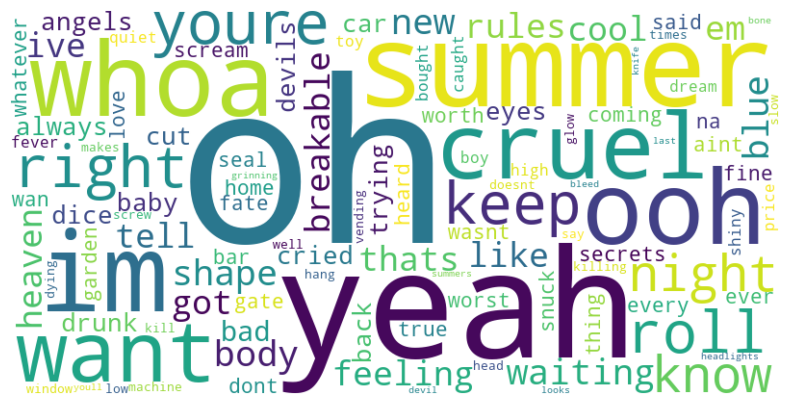

In [430]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

In [431]:
# First, ensure that all lyrics are indeed strings
merged_df['lyrics'] = merged_df['lyrics'].astype(str)

# Concatenate all lyrics into one big text pile
all_lyrics_text = ' '.join(merged_df['lyrics'])

all_lyrics_preprocessed = preprocess(all_lyrics_text)

all_lyrics_preprocessed

all_lyrics_preprocessed_nonan = re.sub(' nan', '', all_lyrics_preprocessed)
all_lyrics_preprocessed_nonan = re.sub('nan ', '', all_lyrics_preprocessed)

words = nltk.word_tokenize(all_lyrics_preprocessed_nonan)
words



['todo',
 'está',
 'bien',
 'no',
 'te',
 'tiene',
 'que',
 'estresar',
 'a',
 'ti',
 'yo',
 'sola',
 'no',
 'te',
 'dejaré',
 'me',
 'encuhlé',
 'la',
 'primera',
 've',
 'que',
 'la',
 'vi',
 'me',
 'enamoré',
 'cuando',
 'con',
 'ella',
 'bailé',
 'desde',
 'hace',
 'rato',
 'se',
 'quería',
 'pegar',
 'puse',
 'la',
 'espalda',
 'contra',
 'la',
 'pared',
 'y',
 'si',
 'yo',
 'bajo',
 'sabe',
 'qué',
 'le',
 'haré',
 'tú',
 'quiere',
 'mami',
 'se',
 'le',
 'viran',
 'los',
 'ojo',
 'la',
 'miro',
 'y',
 'se',
 'relame',
 'el',
 'pintalabio',
 'rojo',
 'esa',
 'cintura',
 'suelta',
 'baby',
 'si',
 'yo',
 'te',
 'cojo',
 'te',
 'subo',
 'a',
 'la',
 'altura',
 'tú',
 'dime',
 'y',
 'te',
 'recojo',
 'ella',
 'a',
 'manejar',
 'me',
 'dejó',
 'siempre',
 'se',
 'va',
 'a',
 'sentir',
 'cuando',
 'a',
 'un',
 'lugar',
 'llegue',
 'yo',
 'yo',
 'estaba',
 'coronando',
 'desde',
 'que',
 'era',
 'menor',
 'por',
 'fotos',
 'se',
 've',
 'bien',
 'pero',
 'de',
 'frente',
 'mejor',
 'se

In [432]:
no_stop_words = del_stop_words(words)

no_stop_words

['bien',
 'estresar',
 'sola',
 'dejaré',
 'encuhlé',
 'primera',
 'vi',
 'enamoré',
 'bailé',
 'hace',
 'rato',
 'quería',
 'pegar',
 'puse',
 'espalda',
 'pared',
 'si',
 'bajo',
 'sabe',
 'haré',
 'quiere',
 'mami',
 'viran',
 'ojo',
 'miro',
 'relame',
 'pintalabio',
 'rojo',
 'cintura',
 'suelta',
 'baby',
 'si',
 'cojo',
 'subo',
 'altura',
 'dime',
 'recojo',
 'manejar',
 'dejó',
 'siempre',
 'va',
 'sentir',
 'lugar',
 'llegue',
 'coronando',
 'menor',
 'fotos',
 'bien',
 'frente',
 'mejor',
 'dio',
 'par',
 'copas',
 'vino',
 'tinto',
 'pidió',
 'pausa',
 'iba',
 'quinto',
 'di',
 'vuelta',
 'barrio',
 'kymco',
 'ello',
 'ven',
 'frente',
 'quedan',
 'trinco',
 'sola',
 'hace',
 'sola',
 'paga',
 'prende',
 'apaga',
 'llamando',
 'atención',
 'quiere',
 'haga',
 'quiere',
 'mami',
 'viran',
 'ojo',
 'miro',
 'relame',
 'pintalabio',
 'rojo',
 'cintura',
 'suelta',
 'baby',
 'si',
 'cojo',
 'subo',
 'altura',
 'dime',
 'recojo',
 'pa',
 'inevitable',
 'bebé',
 'gana',
 'notable

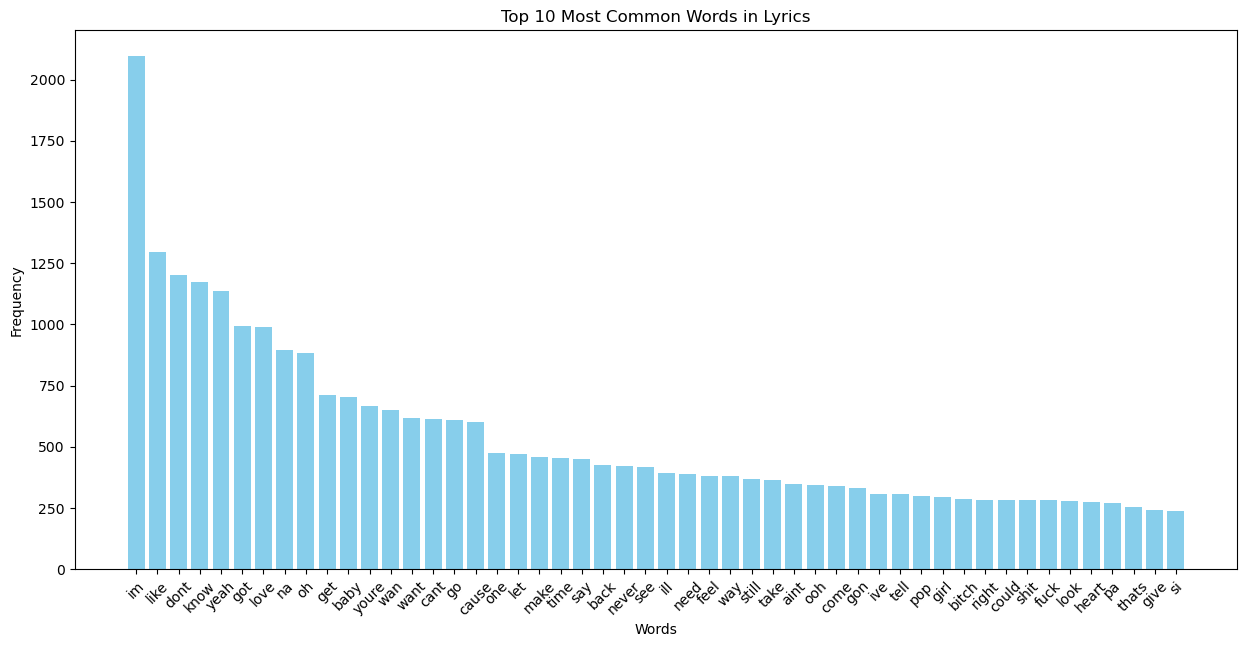

In [433]:
freq = Counter(no_stop_words)

top_n = 50
most_common_words = freq.most_common(top_n)

# Unpack the words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Create bar graph
plt.figure(figsize=(15, 7))  # Set the size of the figure
plt.bar(words, frequencies, color='skyblue')  # Create the bar chart
plt.title('Top 10 Most Common Words in Lyrics')  # Title of the graph
plt.xlabel('Words')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the graph

In [434]:
new_preprocessed_lyrics_col = []

def sentiment_preprocess(col):
    
    for song in merged_df.lyrics:
    
        lyric = preprocess(song)

        words = nltk.word_tokenize(lyric)
        words

        cleaned_col = ' '.join(words)
        
        new_preprocessed_lyrics_col.append(cleaned_col)
    
    return new_preprocessed_lyrics_col

new_lyrics_col = sentiment_preprocess(merged_df.lyrics)


new_df = merged_df.copy()

new_df['lyrics'] = new_lyrics_col

new_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,nan
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,wan na hear a part to my story i tried to hide...
967,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...
968,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,nan
969,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...


In [435]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\edgar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [436]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score
def get_vader_sentiment(lyrics):
    return sia.polarity_scores(lyrics)['compound']

# Apply the function to the 'lyrics' column to create a new 'sentiment' column
new_df['sentiment'] = new_df['lyrics'].apply(get_vader_sentiment)

new_df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics,sentiment
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,nan,0.0000
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...,-0.6808
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...,-0.8692
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...,-0.3867
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...,-0.9595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,wan na hear a part to my story i tried to hide...,0.6113
967,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...,-0.9182
968,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,nan,0.0000
969,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...,-0.9816


In [437]:
# This will create a list of values from 'column_name' that are not NaN
non_nan_df = pd.DataFrame([row for index, row in new_df.iterrows() if row['lyrics'] != 'nan'])

print(len(non_nan_df))
non_nan_df

492


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics,sentiment
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...,-0.6808
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...,-0.8692
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...,-0.3867
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...,-0.9595
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24,the mandem too inconsiderate five star hotels ...,-0.1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,6,11,0,0,96,F,Major,57,55,74,22,0,8,4,my knuckles were bruised like violets sucker p...,0.9595
966,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,wan na hear a part to my story i tried to hide...,0.6113
967,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...,-0.9182
969,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...,-0.9816


In [438]:
# Define the bins for sentiment scores
bins = [-1, -0.05, 0.05, 1]  # Adjust the thresholds as needed
labels = ['negative', 'neutral', 'positive']
non_nan_df['sentiment_category'] = pd.cut(non_nan_df['sentiment'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of the new categorical sentiment
print(non_nan_df['sentiment_category'].value_counts())

# Now, use 'sentiment_category' as the target variable for classification
X = non_nan_df['lyrics']
y = non_nan_df['sentiment_category']

# Ensure there are no NaN values in 'y'
y = y.dropna()

non_nan_df['sentiment_category']


positive    250
negative    230
neutral      12
Name: sentiment_category, dtype: int64


1      negative
2      negative
3      negative
4      negative
5      negative
         ...   
965    positive
966    positive
967    negative
969    negative
970    negative
Name: sentiment_category, Length: 492, dtype: category
Categories (3, object): ['negative' < 'neutral' < 'positive']

In [441]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Assuming your DataFrame is named df and it includes 'lyrics' and 'sentiment_category' columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    non_nan_df['lyrics'], 
    non_nan_df['sentiment_category'], 
    test_size=0.2, 
    random_state=42
)

# Create a pipeline with TF-IDF Vectorizer and a classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the predictions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Use the trained pipeline to predict sentiment categories for new lyrics
# new_lyrics = ["Some new lyrics to analyze"]
# new_sentiment = pipeline.predict(new_lyrics)
# print(f"Predicted Sentiment: {new_sentiment[0]}")


              precision    recall  f1-score   support

    negative       0.76      0.63      0.69        41
     neutral       0.33      0.50      0.40         2
    positive       0.79      0.88      0.83        56

    accuracy                           0.77        99
   macro avg       0.63      0.67      0.64        99
weighted avg       0.77      0.77      0.77        99

[[26  2 13]
 [ 1  1  0]
 [ 7  0 49]]


In [458]:
non_nan_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics,sentiment,sentiment_category
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...,-0.6808,negative
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...,-0.8692,negative
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...,-0.3867,negative
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...,-0.9595,negative
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24,the mandem too inconsiderate five star hotels ...,-0.1975,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,6,11,0,0,96,F,Major,57,55,74,22,0,8,4,my knuckles were bruised like violets sucker p...,0.9595,positive
966,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,wan na hear a part to my story i tried to hide...,0.6113,positive
967,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...,-0.9182,negative
969,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...,-0.9816,negative


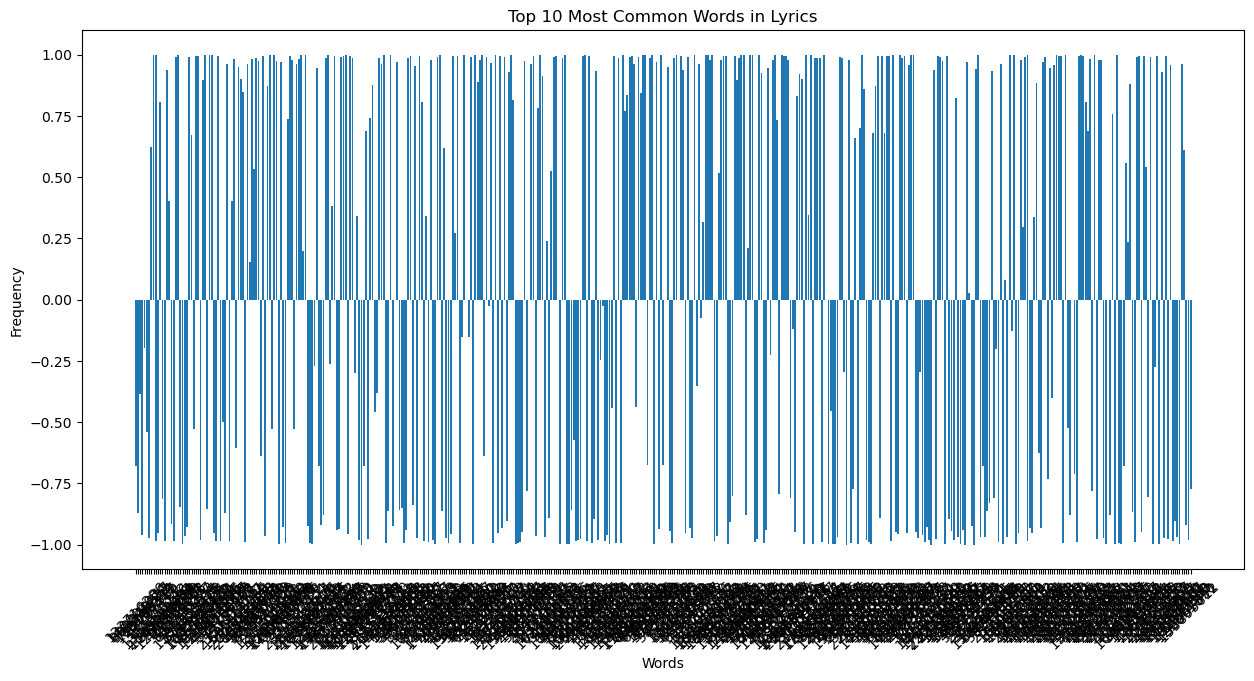

In [459]:
# Create bar graph
plt.figure(figsize=(15, 7))  # Set the size of the figure
plt.bar(non_nan_df.streams, non_nan_df.sentiment)  # Create the bar chart
plt.title('Top 10 Most Common Words in Lyrics')  # Title of the graph
plt.xlabel('Words')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the graph

In [479]:
count_pos = non_nan_df[non_nan_df['sentiment'] > 0]

count_neg = non_nan_df[non_nan_df['sentiment'] < 0]


count_neg

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics,sentiment,sentiment_category
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,todo está bien no te tiene que estresar a ti y...,-0.6808,negative
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,hate to give the satisfaction asking how youre...,-0.8692,negative
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,yeah yeah yeah yeah fever dream high in the qu...,-0.3867,negative
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,baby dime la verdad si te olvidaste de mí yo s...,-0.9595,negative
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24,the mandem too inconsiderate five star hotels ...,-0.1975,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,BackOutsideBoyz,Drake,1,2022,11,4,1045,0,93367537,8,5,2,0,0,142,F,Minor,85,40,43,4,0,39,32,backoutsideboyz totin a seventy on the strip i...,-0.9693,negative
964,Broke Boys,"Drake, 21 Savage",2,2022,11,4,1060,0,106249219,3,8,5,0,0,120,D,Major,64,11,53,1,0,25,27,yeah ayy hop in that bitch and i start the v s...,-0.9993,negative
967,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,no words appear before me in the aftermath sal...,-0.9182,negative
969,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,una noche que no puedo olvidar y aunque tenga ...,-0.9816,negative


In [ ]:
#stream coreelation with sentiment
